# Digital Witch Community: Whatsapp Chat Analysis

## Group 5 IT Support Class from 11th October, 2021 to 10th October, 2022

#### Notebook by Amarachi Ugagbe-17th November, 2022

### Importing Necessary Libraries

In [1]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Defining the Functions as the .txt docuemnts has several things like date time format, author and the messages

In [2]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMessage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        contact=splitmessage[0]
        message=splitmessage[1]
    else:
        contact=None
    return date, time, contact, message
    

## Data Pre-processing

In [3]:
data=[]
conversation='Group 5 IT Support Class.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, contact= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, contact, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, contact, message=getMessage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

## Transformation of the dataset

In [4]:
# Load to pandas df
df = pd.DataFrame(data, columns=["Date", 'Time', 'contact','Message'])

# Convert date to pandas datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# to show the first 5 rows with its header
df.head(5)

,Date,Time,contact,Message
0,2021-10-11,9:34 AM,+234 806 458 9511,💯💯💯👍🏻
1,2021-10-11,9:34 AM,Nonso IT Class,That means you just copy it from MS word and p...
2,2021-10-11,9:35 AM,Nonso IT Class,But remember to also bring in their keywords i...
3,2021-10-11,9:36 AM,Linda IT Class,<Media omitted>
4,2021-10-11,9:36 AM,+234 810 067 4360,"Yeah, some job description are very tricky in ..."


In [6]:
# checking for the total number of messages in the chat
total_messages = df.shape[0]
print(total_messages)

37762


In [7]:
# Creating year, month and day columns
import datetime as dt
# Generate Year colum
df['Year'] = df['Date'].dt.year
# Generate Month colum 
df['Month'] = df['Date'].dt.month
# Generate day colum 
df['Day'] = df['Date'].dt.day

In [8]:
#you can rename or replace observations, thats changing the numbers to letter name for months.
df['Month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',10:'October', 11:'November', 12:'December'})

0        October
1        October
2        October
3        October
4        October
          ...   
37757    October
37758    October
37759    October
37760    October
37761    October
Name: Month, Length: 37762, dtype: object

In [9]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37762 entries, 0 to 37761
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     37762 non-null  datetime64[ns]
 1   Time     37762 non-null  object        
 2   contact  35478 non-null  object        
 3   Message  37762 non-null  object        
 4   Year     37762 non-null  int64         
 5   Month    37762 non-null  int64         
 6   Day      37762 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.0+ MB


In [10]:
#let's find out if we have duplicates of values
df.duplicated().sum()

2269

In [11]:
#Let's check the data type
df.dtypes

Date       datetime64[ns]
Time               object
contact            object
Message            object
Year                int64
Month               int64
Day                 int64
dtype: object

In [12]:
# to check the number of contacts in the group
df.contact.nunique()

218

In [13]:
#Checking Null Values
print(df.count().sort_values())

contact    35478
Date       37762
Time       37762
Message    37762
Year       37762
Month      37762
Day        37762
dtype: int64


In [14]:
#finding % of missing values for each column
df.isnull().sum()*int(100/len(df))

Date       0
Time       0
contact    0
Message    0
Year       0
Month      0
Day        0
dtype: int64

In [15]:
df_pivot=pd.pivot_table(df, values='Day', columns=['Date'])
df_pivot

Date,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,...,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-09,2022-10-10
Day,11,12,13,14,15,16,17,18,19,20,...,30,1,2,3,4,5,6,7,9,10


In [16]:
df.head(10)

,Date,Time,contact,Message,Year,Month,Day
0,2021-10-11,9:34 AM,+234 806 458 9511,💯💯💯👍🏻,2021,10,11
1,2021-10-11,9:34 AM,Nonso IT Class,That means you just copy it from MS word and p...,2021,10,11
2,2021-10-11,9:35 AM,Nonso IT Class,But remember to also bring in their keywords i...,2021,10,11
3,2021-10-11,9:36 AM,Linda IT Class,<Media omitted>,2021,10,11
4,2021-10-11,9:36 AM,+234 810 067 4360,"Yeah, some job description are very tricky in ...",2021,10,11
5,2021-10-11,9:37 AM,Linda IT Class,Listen to my voice,2021,10,11
6,2021-10-11,9:38 AM,Linda IT Class,<Media omitted>,2021,10,11
7,2021-10-11,9:38 AM,Nonso IT Class,Yeah,2021,10,11
8,2021-10-11,9:39 AM,Nonso IT Class,Yeah,2021,10,11
9,2021-10-11,9:39 AM,Yemisi IT Group,This sound like a good plan. Thank you,2021,10,11


In [17]:
df.tail(10)

,Date,Time,contact,Message,Year,Month,Day
37752,2022-10-10,6:08 PM,Nonso IT Class,8pm is fine. Thanks,2022,10,10
37753,2022-10-10,6:10 PM,Stella IT group Chekwube,Thank you so much Ekwy,2022,10,10
37754,2022-10-10,6:11 PM,+234 806 862 7525,Thanks Ekwy,2022,10,10
37755,2022-10-10,6:53 PM,+234 706 184 0650,Thanks,2022,10,10
37756,2022-10-10,6:58 PM,Ime IT Group,Awww! Thanks Ekwy.We Love you too❤️,2022,10,10
37757,2022-10-10,7:00 PM,Miracle Ehirim IT Group,Thank you Ekwy,2022,10,10
37758,2022-10-10,7:03 PM,@GodOverEverything,Thanks Ekwy,2022,10,10
37759,2022-10-10,7:41 PM,Ezinne IT group,"That's a good one.thank you, Ekwy.",2022,10,10
37760,2022-10-10,7:52 PM,+234 802 222 0982,Thank you Ekwy,2022,10,10
37761,2022-10-10,8:09 PM,Michelle IT group,Thank you Ekwy,2022,10,10


## PERFORMANCE OF THE GROUP

C:\Users\Amarachi Ugagbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Chat count per month')

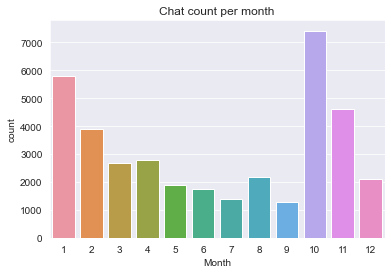

In [18]:
#you visualize monthly performance of the group
sns.set_style('darkgrid' )

sns.countplot(df.Month).set_title('Chat count per month')

In [19]:
# to count the number of emoji present in the group chats
def split_count(text):
    emoji_list = []
    
    df = regex.findall(r'\X',text)
    for word in df:
        emoji_list.append(word)
    return emoji_list

df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

2363855


In [20]:
#checking for the total number of media messages in the chat
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

4674


In [21]:
#to get the number of links  and other activitiesin the group chat

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between group members")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Links Shared", links)

Chats between group members
Total Messages:  37762
Number of Media Shared:  4674
Number of Links Shared 2896


## More Insights

In [22]:
unique_numb=df.contact.unique()
l=unique_numb.tolist()

media_messages_df = df[df['Message'] == '']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [23]:
action_dict=[]
for i in range(len(l)):
  #Filtering out messages of particular user
  req_df= messages_df[messages_df["contact"] == l[i]]  #req_df will contain messages of only one particular user
  namem=l[i]   #to get names or each contact in the list
  messag_sent=req_df.shape[0] #shape will print number of rows which indirectly means the number of messages
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  media = media_messages_df[media_messages_df['contact'] == l[i]].shape[0] #media conists of media messages
  emojis = sum(req_df['emoji'].str.len())#emojis consists of total emojis
  links = sum(req_df["urlcount"])     #links consist of total links
  #to append or add variables to empty list
  action_dict.append([namem,messag_sent,(words_per_message),media,emojis,links])

C:\Users\Amarachi Ugagbe\AppData\Local\Temp\ipykernel_12352\137845615.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [24]:
active_list = pd.DataFrame(action_dict, columns=['names','messages_sent','words_average',"Media","Emojis","Links"])

#finding total count
active_list['Total']=active_list['messages_sent']+active_list['words_average']+active_list['Media']+active_list['Emojis']+active_list['Links']
#or,active_list['Total']=active_list[['names','messages',"Media","Emojis","Links"]].sum(axis=1)

In [25]:
#sort by descending order 
list=active_list.sort_values(by=['Total'],ascending=False)
list

,names,messages_sent,words_average,Media,Emojis,Links,Total
5,Ekwutosina,4166,15.622900,0,441096,390,445667.622900
9,Golden IT Class,2130,10.951643,0,141392,132,143664.951643
1,Nonso IT Class,1050,15.760952,0,87739,4,88808.760952
7,FunmiAde IT group,1286,8.040435,0,58684,3,59981.040435
43,Lucia Bestlove IT Class,1125,9.460444,0,57294,14,58442.460444
...,...,...,...,...,...,...,...
183,+234 813 473 9850,1,3.000000,0,14,0,18.000000
205,+234 816 380 5698,3,1.333333,0,7,0,11.333333
181,+234 803 775 9259,1,1.000000,0,3,0,5.000000
216,+234 803 323 1443,1,1.000000,0,1,0,3.000000


## Further Visualization

### Top 10 Active Members

In [26]:
top_list=list.head(10)
top_list

,names,messages_sent,words_average,Media,Emojis,Links,Total
5,Ekwutosina,4166,15.622900,0,441096,390,445667.622900
9,Golden IT Class,2130,10.951643,0,141392,132,143664.951643
1,Nonso IT Class,1050,15.760952,0,87739,4,88808.760952
7,FunmiAde IT group,1286,8.040435,0,58684,3,59981.040435
43,Lucia Bestlove IT Class,1125,9.460444,0,57294,14,58442.460444
180,Grace Cubana IT Group,910,9.740659,0,50487,3,51409.740659
122,Goldenjeny IT Group,837,11.102748,0,47820,7,48675.102748
78,Ama IT Group,1239,6.535109,0,44358,0,45603.535109
53,BLESSING VITALIS,729,9.995885,0,41398,3,42139.995885
50,Win IT group,1136,6.142606,0,37759,0,38901.142606


### LEAST 10 ACTIVE GROUP MEMBERS

In [27]:
least_1ist=list.tail(10)

In [28]:
least_1ist

,names,messages_sent,words_average,Media,Emojis,Links,Total
218,+234 807 273 4824,1,2.000000,0,24,0,27.000000
189,+234 803 287 9075,2,1.000000,0,19,0,22.000000
217,+234 816 425 4423,2,1.000000,0,17,0,20.000000
166,+234 810 101 5622,1,2.000000,0,15,0,18.000000
174,+44 7741 969250,1,2.000000,0,15,0,18.000000
183,+234 813 473 9850,1,3.000000,0,14,0,18.000000
205,+234 816 380 5698,3,1.333333,0,7,0,11.333333
181,+234 803 775 9259,1,1.000000,0,3,0,5.000000
216,+234 803 323 1443,1,1.000000,0,1,0,3.000000
25,None,0,NaN,0,0,0,NaN


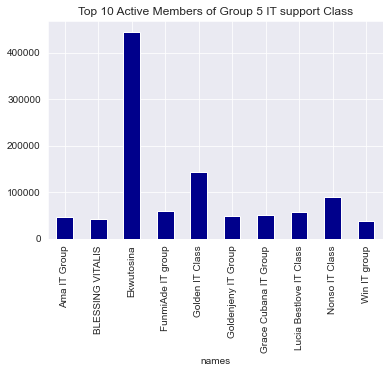

In [35]:
vl=top_list.groupby('names')['Total'].sum()
vl.plot(kind='bar', color='darkblue',title ='Top 10 Active Members of Group 5 IT support Class')
plt.show()

In [30]:
#using natural language processing library to check for the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments=SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Message"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Message"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Message"]]

df.head(10)

,Date,Time,contact,Message,Year,Month,Day,emoji,urlcount,Positive,Negative,Neutral
0,2021-10-11,9:34 AM,+234 806 458 9511,💯💯💯👍🏻,2021,10,11,"[💯, 💯, 💯, 👍🏻]",0,0.000,0.000,1.000
1,2021-10-11,9:34 AM,Nonso IT Class,That means you just copy it from MS word and p...,2021,10,11,"[T, h, a, t, , m, e, a, n, s, , y, o, u, , ...",0,0.000,0.000,1.000
2,2021-10-11,9:35 AM,Nonso IT Class,But remember to also bring in their keywords i...,2021,10,11,"[B, u, t, , r, e, m, e, m, b, e, r, , t, o, ...",0,0.000,0.000,1.000
3,2021-10-11,9:36 AM,Linda IT Class,<Media omitted>,2021,10,11,"[<, M, e, d, i, a, , o, m, i, t, t, e, d, >]",0,0.000,0.000,1.000
4,2021-10-11,9:36 AM,+234 810 067 4360,"Yeah, some job description are very tricky in ...",2021,10,11,"[Y, e, a, h, ,, , s, o, m, e, , j, o, b, , ...",0,0.139,0.058,0.803
5,2021-10-11,9:37 AM,Linda IT Class,Listen to my voice,2021,10,11,"[L, i, s, t, e, n, , t, o, , m, y, , v, o, ...",0,0.000,0.000,1.000
6,2021-10-11,9:38 AM,Linda IT Class,<Media omitted>,2021,10,11,"[<, M, e, d, i, a, , o, m, i, t, t, e, d, >]",0,0.000,0.000,1.000
7,2021-10-11,9:38 AM,Nonso IT Class,Yeah,2021,10,11,"[Y, e, a, h]",0,1.000,0.000,0.000
8,2021-10-11,9:39 AM,Nonso IT Class,Yeah,2021,10,11,"[Y, e, a, h]",0,1.000,0.000,0.000
9,2021-10-11,9:39 AM,Yemisi IT Group,This sound like a good plan. Thank you,2021,10,11,"[T, h, i, s, , s, o, u, n, d, , l, i, k, e, ...",0,0.664,0.000,0.336


In [31]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutral")

score(x,y,z)

Neutral


In [32]:
x, y, z

(10347.591000000095, 882.4300000000005, 26255.938000000486)

There are 2406054 words in all the messages.


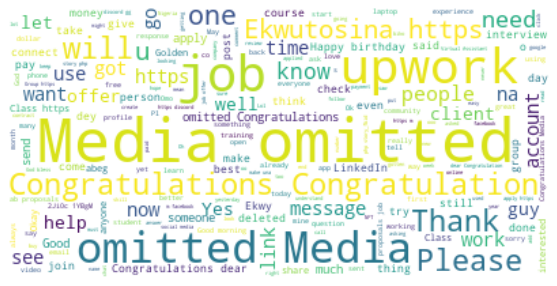

In [33]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
df.to_excel('GROUP 5 IT SUPPORT.xlsx')

## Summary and Findings


### 1. There are a Total of 37762 Messages in the group

### 2. There are 4674 "Number of Media" Shared in the group

### 3. Number of Links Shared in the group is 2896

### 4. There were 218 Unique/active pesons in the group

### 5. The Top 10 people in the group are:
   *Ekwutosina*, 
   *Golden IT class*, 
   *Nonso IT class*, 
   *FunmiAde*,
   *Lucia Bestlove*,
  *Grace Cubana*,
  *Goldenjenny*,
   *Ama*,
   *Blessing Vitalis* and,
   *Win IT*
   
### 6. October is the month with the highest Messages, followed by January

### 7. The general tempo or sentiment in the group is Neutral

### 8. Congratulations, Upwork and job seem to be some of the most commmonly used words